In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class NN:
    def __init__(self,inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.lr = learningrate
        
        self.w_ih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.w_ho = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
    
    def act_func(self, x):
        return 1/(1+np.exp(-x))
    
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.w_ih, inputs)
        hidden_outputs = self.act_func(hidden_inputs)
        
        final_inputs = np.dot(self.w_ho, hidden_outputs)
        final_outputs = self.act_func(final_inputs)
        
        # hidden과 output 사이
        output_errors = targets - final_outputs
        
        # input과 hidden 사이
        hidden_errors = np.dot(self.w_ho.T, output_errors)
        
        self.w_ho += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), hidden_outputs.T)
        self.w_ih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), inputs.T)
        
        
    def query(self, input_list):
        inputs = np.array(input_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.w_ih, inputs)
        hidden_outputs = self.act_func(hidden_inputs)
        
        final_inputs = np.dot(self.w_ho, hidden_outputs)
        final_outputs = self.act_func(final_inputs)
        
        return final_outputs

In [13]:
# 데이터 로드
data_file = open("./mnist_train.csv",'r');
data_list = data_file.readlines()
data_file.close()

In [49]:
# 학습
inode = 28*28
hnode = 28*28
onode = 10
learning_rate = 0.1

nn = NN(inode,hnode,onode,learning_rate)

for record in data_list:
    datas = np.asfarray(record.split(','))
    input_data = (datas[1:]/255*0.99) + 0.01
    target_data = np.ones(onode)*0.001
    target_data[int(datas[0])] = 1
    nn.train(input_data, target_data)
    
# label = np.asfarray(values[0])
# plt.imshow(img_arr, cmap='Greys', interpolation='None')
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


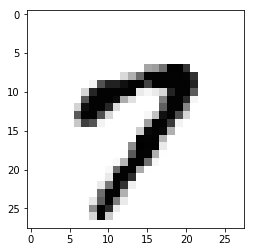

this image :  7
Output :  7
[[ 0.00006511]
 [ 0.00000658]
 [ 0.00055853]
 [ 0.00000329]
 [ 0.0001042 ]
 [ 0.00011416]
 [ 0.00000113]
 [ 0.97338398]
 [ 0.00006572]
 [ 0.08396121]]


In [162]:
# 케이스 테스트
case = 15
datas = np.asfarray(data_list[case].split(','))

input_data = datas[1:]
target_data = datas[0]

output = nn.query(input_data)

plt.imshow(input_data.reshape((28,28)), cmap='Greys', interpolation='None')
plt.show()

# 소수 과학적 표기 -> 일반적 표기로 전환
def array_print(list):
    np.set_printoptions(suppress=True)
    print(list)
    np.set_printoptions(suppress=False)    

print("this image : ",int(target_data))
print("Output : ", np.argmax(output))
array_print(output)

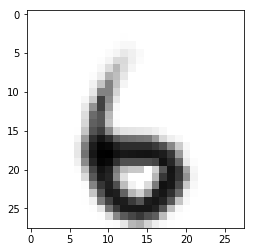

Output :  6
[[ 0.00115156]
 [ 0.00009901]
 [ 0.02718053]
 [ 0.00000622]
 [ 0.00094735]
 [ 0.04203773]
 [ 0.54366876]
 [ 0.00000184]
 [ 0.04564173]
 [ 0.00002256]]


In [161]:
# 직접 그린 데이터로 질의
from PIL import Image
im = Image.open("test.png")
pix = im.load()

t = np.zeros((28,28))

for i in range(28):
    for j in range(28):
        t[j,i] = 255 - (sum(pix[i,j])/3)

plt.imshow(t, cmap='Greys')
plt.show()
test_input_data = (t.reshape(28*28)/255*0.99)+0.01
test_output_data = nn.query(test_input_data)

print("Output : ", np.argmax(test_output_data))
array_print(test_output_data)